In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle competitions download -c 'CSC4851 Homework4'
! kaggle competitions download -c csc4851-homework4 
! unzip /content/csc4851-homework4.zip


Streaming output truncated to the last 5000 lines.
  inflating: birds_400/train/VERMILION FLYCATHER/102.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/103.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/104.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/105.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/106.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/107.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/108.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/109.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/110.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/111.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/112.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/113.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/114.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/115.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/116.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/117.jpg  
  inf

In [2]:
import os
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import torch

data_dir = '/content/birds_400'
print(os.listdir(data_dir))

classes = os.listdir(data_dir + '/train')
print(classes)
print(len(classes))

trans = transforms.Compose([
    ######## ADD YOUR CODE HERE ########
    transforms.Resize(227),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616]),
    transforms.Lambda(lambda x: torch.stack([(crop) for crop in x]))
])

train_ds = ImageFolder(data_dir+'/train', transform = trans)
test_ds = ImageFolder(data_dir+'/test', transform = trans)
valid_ds = ImageFolder(data_dir+'/valid', transform = trans)


['train', 'valid', 'test', 'birds latin names.csv', 'class_dict.csv', 'birds.csv', 'submission.csv']
['BALTIMORE ORIOLE', 'BAND TAILED GUAN', 'GLOSSY IBIS', 'RED HEADED WOODPECKER', 'SCARLET CROWNED FRUIT DOVE', 'WOOD DUCK', 'PAINTED BUNTING', 'BALI STARLING', 'GRAY KINGBIRD', 'PYGMY KINGFISHER', 'CRESTED KINGFISHER', 'BORNEAN BRISTLEHEAD', 'SCARLET TANAGER', 'GURNEYS PITTA', 'ORANGE BRESTED BUNTING', 'BIRD OF PARADISE', 'HOATZIN', 'EURASIAN GOLDEN ORIOLE', 'CALIFORNIA CONDOR', 'BLUE COAU', 'YELLOW HEADED BLACKBIRD', 'NICOBAR PIGEON', 'ROSY FACED LOVEBIRD', 'TRUMPTER SWAN', 'BARROWS GOLDENEYE', 'AFRICAN FIREFINCH', 'BUSH TURKEY', 'APAPANE', 'CAPE LONGCLAW', 'BLACK COCKATO', 'GOLDEN CHLOROPHONIA', 'PINK ROBIN', 'BLACK BAZA', 'CASSOWARY', 'GILDED FLICKER', 'RED BELLIED PITTA', 'AMERICAN AVOCET', 'GUINEA TURACO', 'SPOON BILED SANDPIPER', 'COMMON STARLING', 'BELTED KINGFISHER', 'D-ARNAUDS BARBET', 'EASTERN BLUEBIRD', 'GREAT GRAY OWL', 'RAZORBILL', 'SRI LANKA BLUE MAGPIE', 'RED FODY', 'NOIS

In [3]:
from torch.utils.data.dataloader import DataLoader

batch_size = 512
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size*2, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, shuffle=True, num_workers=3, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


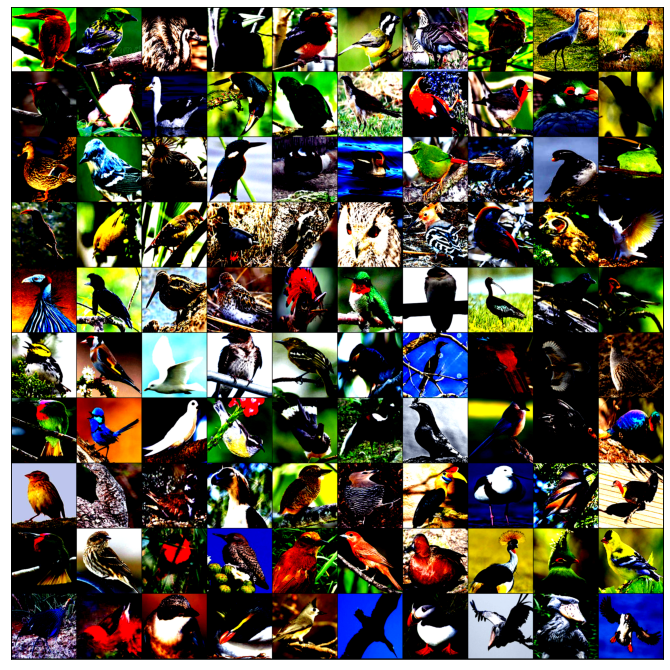

In [4]:
from torchvision.utils import make_grid
from matplotlib import pyplot as plt
    
for images, labels in train_dl:
      fig, ax = plt.subplots(figsize = (12,12))
      ax.set_xticks([]); ax.set_yticks([])
      ax.imshow(make_grid(images[: 100], 10).permute(1,2,0))
      break

In [5]:

img, label = train_ds[600]
print(label)
img.shape, label

3


(torch.Size([3, 227, 227]), 3)

In [6]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline

data = pd.read_csv(data_dir+'/birds.csv')
data.head()

,class index,filepaths,labels,data set
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train


In [7]:
data.tail()

,class index,filepaths,labels,data set
62383,399,valid/YELLOW HEADED BLACKBIRD/1.jpg,YELLOW HEADED BLACKBIRD,valid
62384,399,valid/YELLOW HEADED BLACKBIRD/2.jpg,YELLOW HEADED BLACKBIRD,valid
62385,399,valid/YELLOW HEADED BLACKBIRD/3.jpg,YELLOW HEADED BLACKBIRD,valid
62386,399,valid/YELLOW HEADED BLACKBIRD/4.jpg,YELLOW HEADED BLACKBIRD,valid
62387,399,valid/YELLOW HEADED BLACKBIRD/5.jpg,YELLOW HEADED BLACKBIRD,valid


In [8]:
class_data = data.loc[:,["class index","labels"]]
class_data.head()

,class index,labels
0,0,ABBOTTS BABBLER
1,0,ABBOTTS BABBLER
2,0,ABBOTTS BABBLER
3,0,ABBOTTS BABBLER
4,0,ABBOTTS BABBLER


In [9]:
class_data.shape
class_data.describe
class_data.columns
class_data.nunique

<bound method DataFrame.nunique of        class index                   labels
0                0          ABBOTTS BABBLER
1                0          ABBOTTS BABBLER
2                0          ABBOTTS BABBLER
3                0          ABBOTTS BABBLER
4                0          ABBOTTS BABBLER
...            ...                      ...
62383          399  YELLOW HEADED BLACKBIRD
62384          399  YELLOW HEADED BLACKBIRD
62385          399  YELLOW HEADED BLACKBIRD
62386          399  YELLOW HEADED BLACKBIRD
62387          399  YELLOW HEADED BLACKBIRD

[62388 rows x 2 columns]>

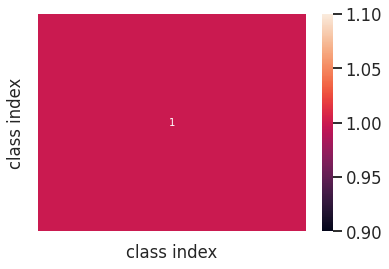

In [10]:
# Clean 

class_data.isnull().sum()
correlation = class_data.corr()
seaborn.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot= True)

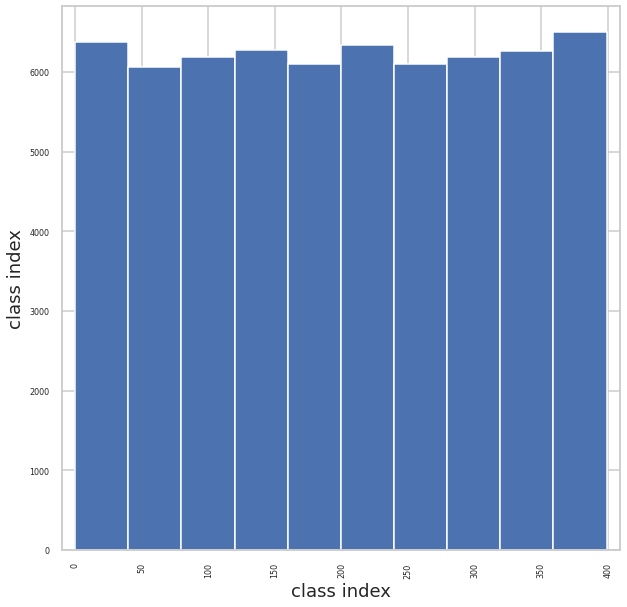

In [11]:
import pandas
from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha=0.5, figsize=(10, 10))
plt.show()

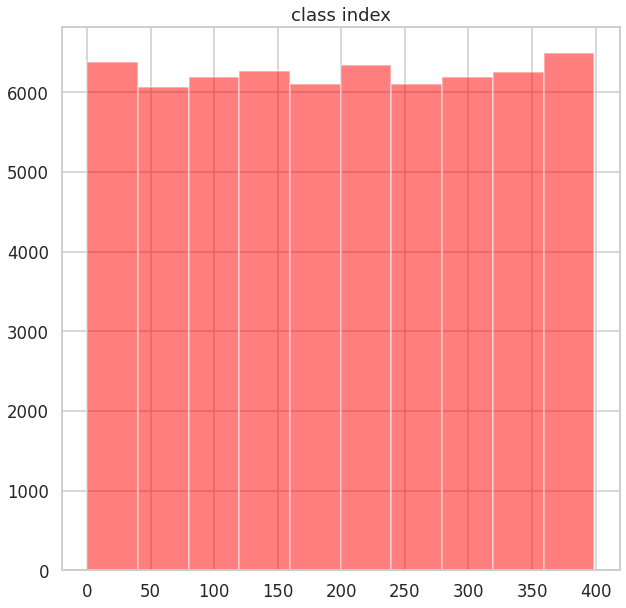

In [12]:
data.hist(alpha=0.5, figsize=(10, 10), color='red')
plt.show()

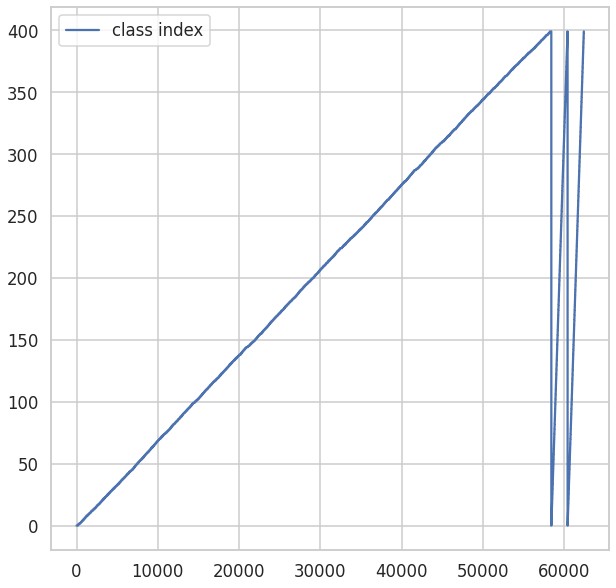

In [13]:
data.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

In [14]:
from torchvision import models
import torch.nn as nn
import torch.nn.functional as F
import torch

epochs = 1

resnet50 = models.resnet50(pretrained=True)
for param in resnet50.parameters():
  param.requires_grad = False

fc_inputs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 400),
    nn.LogSoftmax(dim=1) 
)
resnet50 = resnet50.to('cuda:0')
optimizer = torch.optim.Adam(resnet50.parameters())

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()
loss_criterion = F.cross_entropy

for epoch in range(epochs):
        
        print("Epoch: {}/{}".format(epoch+1, epochs))
        # Set to training mode
        resnet50.train()
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        valid_loss = 0.0
        valid_acc = 0.0
        for i, (inputs, labels) in enumerate(train_dl):
            inputs = inputs.to(device)
            labels = labels.to(device)
            inputs, labels = inputs.cuda(), labels.cuda()
            # Clean existing gradients
            optimizer.zero_grad()
            # Forward pass - compute outputs on input data using the model
            outputs = resnet50(inputs)
            # Compute loss
            loss = loss_criterion(outputs, labels)
            # Backpropagate the gradients
            loss.backward()
            # Update the parameters
            optimizer.step()
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))



Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Epoch: 1/1


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Batch number: 000, Training: Loss: 5.9946, Accuracy: 0.0020
Batch number: 001, Training: Loss: 6.0342, Accuracy: 0.0000
Batch number: 002, Training: Loss: 6.1297, Accuracy: 0.0000
Batch number: 003, Training: Loss: 6.0169, Accuracy: 0.0039
Batch number: 004, Training: Loss: 5.9777, Accuracy: 0.0059
Batch number: 005, Training: Loss: 5.9616, Accuracy: 0.0059
Batch number: 006, Training: Loss: 5.9536, Accuracy: 0.0059
Batch number: 007, Training: Loss: 5.9399, Accuracy: 0.0156
Batch number: 008, Training: Loss: 5.9712, Accuracy: 0.0020
Batch number: 009, Training: Loss: 5.9467, Accuracy: 0.0078
Batch number: 010, Training: Loss: 5.9632, Accuracy: 0.0059
Batch number: 011, Training: Loss: 5.9111, Accuracy: 0.0254
Batch number: 012, Training: Loss: 5.8895, Accuracy: 0.0078
Batch number: 013, Training: Loss: 5.8819, Accuracy: 0.0273
Batch number: 014, Training: Loss: 5.8886, Accuracy: 0.0059
Batch number: 015, Training: Loss: 5.8690, Accuracy: 0.0195
Batch number: 016, Training: Loss: 5.882

In [15]:

torch.save(resnet50, '/content/model.h5')

In [16]:
def accuracy(output, labels):
    _, preds = torch.max(output, dim = 1)
    return torch.sum(preds == labels).item() / len(preds)

def calc_accuracy(true,pred):
    pred = F.softmax(pred, dim = 1)
    true = torch.zeros(pred.shape[0], pred.shape[1]).scatter_(1, true.unsqueeze(1), 1.)
    acc = (true.argmax(-1) == pred.argmax(-1)).float().detach().numpy()
    acc = float((100 * acc.sum()) / len(acc))
    return round(acc, 4)

def loss_batch(model, loss_func, x, y, opt = torch.optim.Adam(resnet50.parameters(), lr=1e-3), metric = accuracy):
    metric_result = None 
    pred = model(x)
    loss = loss_func(pred, y)
    
    if opt is not None:
        
        opt.zero_grad()
        # if val == False:
        #   loss.requires_grad = True
        loss.backward()
        opt.step()
    
    if metric is not None:
        
        metric_result = metric(pred, y)
        
    return loss.item(), len(x), metric_result

def evaluate(model, loss_fn, val_dl, metric):
    
    results = []
    with torch.no_grad():
        
        results = [loss_batch(model, loss_fn, x.cuda(), y.cuda(), metric=metric) for x, y in valid_dl]
        losses, nums, metrics = zip(*results)
        avg_metric = None
        
        total = np.sum(nums)
        
        avg_loss = np.sum(np.multiply(losses, nums)) / total      
        
        avg_metric = np.sum(np.multiply(metrics, nums)) / total
            
    return avg_loss, total, avg_metric

In [17]:
evaluate(resnet50, loss_criterion, valid_dl, accuracy)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


RuntimeError: ignored

In [ ]:
val_loss = []
val_accuracy = []

for images, labels in test_dl:
        
        images = images.to(device)
        labels = labels.to(device)
        
        #Forward ->
        preds = resnet50(images)
        
        #Calculate Accuracy
        acc = calc_accuracy(labels.cpu(), preds.cpu())
        
        #Calculate Loss
        criterion = nn.CrossEntropyLoss()
        loss = criterion(preds, labels)
        
        #Append loss & acc
        loss_value = loss.item()
        val_epoch_loss.append(loss_value)
        val_epoch_accuracy.append(acc)